# Import Necessary Packages

In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

# Import Ratings Data

In [3]:
r=pd.read_csv('ratings.csv')

In [4]:
#size
r.shape

(5976479, 3)

In [4]:
#lets take a look at the dataset
r.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


Text(0.5,1,'User Distribution by Rating')

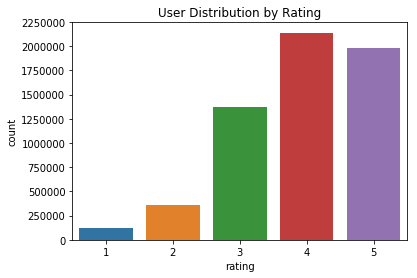

In [6]:
sns.countplot(x="rating", data=r)
plt.title('User Distribution by Rating')

- Since the dataset has 5976479 rows, there is a likelyhood that we will have memory error while modeling due to the processing capabiities with any personal computer for regular use.
- Lets see if we can filter out some of the data

# Check If All Users Rated Significant Number of  Books

In [6]:
# Number of ratings per user 
ratings_per_user = r.groupby('user_id')['rating'].count().reset_index().sort_values('rating', ascending=False)
ratings_per_user.head(10)

,user_id,rating
30943,30944,200
12873,12874,200
52035,52036,199
12380,12381,199
28157,28158,199
45553,45554,197
6629,6630,197
15603,15604,196
37833,37834,196
19728,19729,196


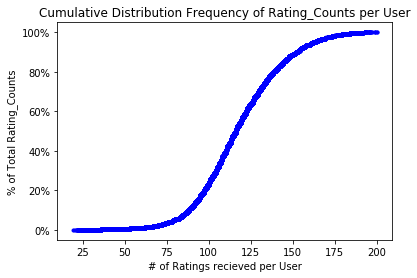

In [7]:
# A distribution of rating counts per user 
def ecdf(array):
    """Compute ECDF for 1D array of measurement data."""
    x = np.sort(array)  #sort array to use as the x axis  
    cdf = np.cumsum(np.sort(array))# Create an array that will store cumulative count value
    y = cdf/np.amax(cdf) #normalized the array 
    return x,y

fig, ax = plt.subplots()
x,y = ecdf(ratings_per_user.rating)
ax.plot(x, y, marker = '.', linestyle='none',color='blue');
ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])
ax.set_xlabel('# of Ratings recieved per User');
ax.set_ylabel('% of Total Rating_Counts');
ax.set_title('Cumulative Distribution Frequency of Rating_Counts per User');

plt.show()
plt.show()


In [20]:
print('number of users giving no ratings',(ratings_per_user.rating ==0).astype(int).sum(axis = 0))
print('minimum number ratings provided by any user',min(ratings_per_user.rating))

number of users giving no ratings 0
minimum number ratings provided by any user 19


In [8]:
threshold_ratings_per_user = ratings_per_user [ratings_per_user['rating']<=40]
threshold_ratings_per_user.head(10)

,user_id,rating
43652,43653,40
36194,36195,40
26630,26631,40
22540,22541,40
30028,30029,40
43374,43375,40
50317,50318,40
37043,37044,40
35808,35809,40
23301,23302,40


In [9]:
print(threshold_ratings_per_user.shape)
print(ratings_per_user.shape)

(541, 2)
(53424, 2)


# Lets Filter Some Users who are Relatively Less Active

In [10]:
# Define a function to create a Boolean Mask 
def Filtered(dataframe,List):
    if dataframe in List:
        dataframe = False
    else:
        dataframe = True
    return dataframe

In [11]:
user_ids_with_low_review = list(set(threshold_ratings_per_user.user_id))
len(user_ids_with_low_review)

541

In [12]:
# Apply the function defined above to make a boolean mask based on user_ids_to_keep 
Filter = r.user_id.apply(lambda x:Filtered(x,user_ids_with_low_review))

In [13]:
# Use the boolean mask to filter data
r= r[Filter]
r.shape

(5959050, 3)

# Check if All Books Received Significant Number of Ratings 

In [14]:
# Number of ratings per book
ratings_per_book = r.groupby('book_id')['rating'].count().reset_index().sort_values('rating', ascending=False)
ratings_per_book.head()

,book_id,rating
0,1,22749
1,2,21753
3,4,19061
2,3,16835
4,5,16580


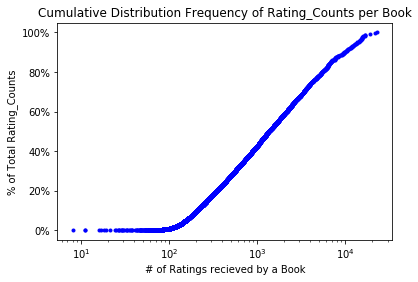

In [15]:
# A distribution by rating counts per book
fig, ax = plt.subplots()
x,y = ecdf(ratings_per_book.rating)
ax.plot(x, y, marker = '.', linestyle='none',color='blue');
ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])
ax.set_xscale('log');
ax.set_xlabel('# of Ratings recieved by a Book');
ax.set_ylabel('% of Total Rating_Counts');
ax.set_title('Cumulative Distribution Frequency of Rating_Counts per Book');

plt.show()

In [19]:
print('number of books recieving zero ratings',(ratings_per_book.rating ==0).astype(int).sum(axis = 0))
print('minimum number ratings received by any book',min(ratings_per_book.rating))

number of books recieving zero ratings 0
minimum number ratings received by a book 8


In [ ]:
threshold_ratings_per_book = ratings_per_book[ratings_per_book['rating']<=5000]
threshold_ratings_per_book.head()

# Lets Filter Books that Did not Receive Significant Number of Reviews

In [ ]:
book_ids_with_low_review = list(set(threshold_ratings_per_book.book_id))
len(book_ids_with_low_review)

In [ ]:
# Apply the function defined above to make a boolean mask based on book_ids_to_keep 
Filter = r.book_id.apply(lambda x:Filtered(x,book_ids_with_low_review))

In [ ]:
# Use the boolean mask to filter data
r= r[Filter]

In [ ]:
r.shape

# Lets Import the Filtered Data into a CSV for Modeling

In [ ]:
r.to_csv('ratings_filtered_data.csv', encoding = 'utf-8')

# Summary 

- All the users have rated at least 19 books. 

- All the books have recieved ratings. Minimum number of ratings recieved by a book is 8.

- When we rank books by rating_counts, it seems that the top 10 books recived more than 10000 ratings. Therefore we chose to only consider books that received siginificant number of ratings (at least  5000 ratings).  CDF shows that this will allow us to 80% of all the book  as only  ~20% of the book received more than 5000 ratings

- In later stage of this project, we will also investigate if the the size of the data has a signifcant effect on modeling.

- As the number of books considered are less than the number of users, sparsity is less likely to be an issue for modeling with this dataset.